<img src="exp.PNG"/>

<p style="font-size:30px"><b><font color="blue"><u>La méthode de rectangle et du point milieu</u></font></b></p>

C’est la méthode la plus simple qui consiste à interpoler la fonction f à intégrer par une fonction constante
(polynôme de degré 0).
Si ξ est le point d’interpolation, la formule est la suivante : <img src="1.PNG"/>
Le choix de ξ influence l’erreur E(f) = I – I(f) :
* <b> Si ξ = a ou ξ = b, l’erreur est donnée par :</b> <img src="2.PNG"/>
<b><font color=#D828D8>➔ C’est la méthode du rectangle qui est d’ordre 0.</font></b>

* <b>Si ξ = (a + b)/2, l’erreur est donnée par:</b> <img src="3.PNG"/>
<b><font color=#D828D8>➔ Il s’agit de la méthode du point milieu qui est d’ordre 1.</font></b>

Ainsi, le choix du point milieu améliore l’ordre de la méthode : celle du rectangle est exacte (c’est-à-dire E(f) = 0) pour les fonctions constantes alors que celle du point milieu est exacte pour les polynômes de degré 1. Ceci s’explique par le fait que l’écart d’intégration de la méthode du point milieu donne lieu à deux erreurs d’évaluation, de valeurs absolues égales et de signes opposés.
<img src="4.PNG"/>


In [1]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt

In [2]:
f=lambda x:1/(1+x**2)

<p style="font-size:24px"><b><font color="red"><u>1- La méthode de rectangle </u></font></b></p>

In [3]:
class RectangleG ( object ) :
    def __init__ (self , a , b , n , f ) :
        self.a = a
        self.b = b
        self.x = np.linspace( a , b , n+1 )
        self.f = f
        self.n = n
    def integrate ( self , f ) :
        x= self.x
        y= f( x )
        h = float( x[1] - x[0] )
        s = sum( y[ 0 : -1 ] )
        return h * s
    def Graph ( self , f , resolution =1001 ) :
        xl = self.x
        yl = f(xl)
        xlist_fine =np.linspace( self.a , self.b , resolution )
        for i in range ( self.n ) :
            x_rect = [xl[ i ] , xl[ i ] , xl[ i + 1 ] , xl[i+1] , xl[ i ] ] # abscisses des sommets
            y_rect = [0 , yl[ i ] , yl[ i ] , 0 , 0 ] # ordonnees des sommets
            plt.plot ( x_rect , y_rect , 'r' )
        yflist_fine = f ( xlist_fine )
        plt.plot ( xlist_fine , yflist_fine )
        plt.plot(xl, yl,"bo")
        plt.xlabel ( 'x' )
        plt.ylabel ( ' f ( x ) ' )
        plt.title ( ' Methode des rectangles gauches' )
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

    

In [4]:
f=lambda x:1/(1+x**2)
R=RectangleG(-1,1,5,f)

In [5]:
R.integrate(f)

1.5574660633484165

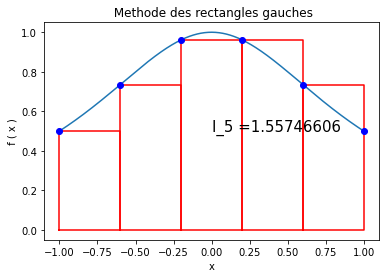

In [6]:
R.Graph(f)

In [7]:
from ipywidgets import interact, interactive, fixed, interact_manual, widgets

In [8]:
def simul1(n,f1):
    R1=RectangleG(-1,1,n,f1)
    return R1.Graph(f1)

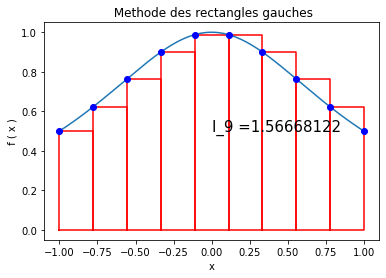

In [9]:
simul1(9,f)

In [10]:
interact(simul1,n=widgets.IntSlider(min=1, max=50, step=3, value=10),f1={'1/(1+x**2)':lambda x:1/(1+x**2),'sin(x)':lambda x: sin(x),'cos(x)':lambda x:cos(x),'x**2-x+5':lambda x:x**2-x+5});

interactive(children=(IntSlider(value=10, description='n', max=50, min=1, step=3), Dropdown(description='f1', …

<p style="font-size:22px"><b><font color=#EB9544><u>Remarques  </u></font></b></p>

* Cette méthode d’intégration est exacte pour toutes les fonctions f constantes (dans ce cas ξ0 = 0 puisque qu’elles vérifient f' = 0). Dans le cas plus général cette méthode est d’autant plus précise que les variations de f sont faibles (f'petit).

* Plus le domaine [a, b] est petit, plus l’erreur est faible. Cette erreur décroit en h2.

<p style="font-size:24px"><b><font color="red"><u>2- La méthode de point milieu </u></font></b></p>

In [11]:
class  RectangleM (object): 
    def __init__(self, a, b, n, f):
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n+1)
        self.f = f
        self.n = n
    def integrate(self,f):
        x=self.x
        h = float(x[1] - x[0])
        s=0
        for i in range(self.n):
            s=s+f((x[i]+x[i+1])*0.5)
        return h*s
       
    def Graph(self,f,resolution=1001):
        xl = self.x
        yl=f(xl);
        xlist_fine=np.linspace(self.a, self.b, resolution)        
        for i in range(self.n):            
            m=(xl[i]+xl[i+1])/2
            x_rect = [xl[i], xl[i], xl[i+1], xl[i+1], xl[i]] 
            y_rect = [0  , f(m), f(m)  , 0 , 0 ] 
            plt.plot(x_rect, y_rect,"r")
            plt.plot(m,f(m),"g*")
            
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine, yflist_fine,'b')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.title('Milieu')
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

In [12]:
f=lambda x:1/(1+x**2)
M=RectangleM(-1,1,5,f)

In [13]:
M.integrate(f)

1.5774600504625738

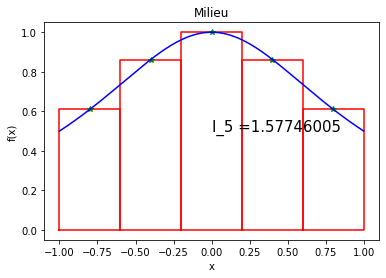

In [14]:
M.Graph(f)

In [15]:
from ipywidgets import interact, interactive, fixed, interact_manual, widgets

In [16]:
def simul(n,f):
    M=RectangleM(-1,1,n,f)
    return M.Graph(f)

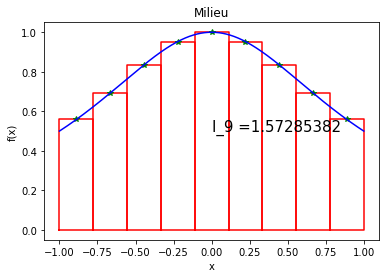

In [17]:
simul(9,f)

In [18]:
interact(simul,n=widgets.IntSlider(min=1, max=50, step=3, value=10),f={'1/(1+x**2)':lambda x:1/(1+x**2),'sin(x)':lambda x: sin(x),'cos(x)':lambda x:cos(x),'x**2-x+5':lambda x:x**2-x+5});

interactive(children=(IntSlider(value=10, description='n', max=50, min=1, step=3), Dropdown(description='f', o…

<p style="font-size:22px"><b><font color=#EB9544><u>Remarques  </u></font></b></p>

* Du fait des symétries, cette méthode d’intégration est exacte pour les fonctions f constante, mais aussi pour les fonctions affines (dans ce cas ξ0' = 0 puisqu’elles vérifient f''= 0).

* Dans le cas plus général, cette méthode est d’autant plus précise que les variations de f sont faibles(f'' petit).

* Plus le domaine [a, b] est petit, plus l’erreur est faible. Cette erreur décroit en h3, c’est à dire plus vite que l’erreur de la méthode précédente . Ainsi, pour des domaines [a, b] suffisamment petits, la méthode du point milieu est toujours plus précise que la méthode précédente.

<p style="font-size:30px"><b><font color="blue"><u>La méthode de trapèze </u></font></b></p>

En interpolant f par un polynôme de degré 1, les deux points d'interpolation (a, f (a)) et (b, f (b)) suffisent à tracer un segment dont l’intégrale correspond à l’aire d’un trapèze, justifiant le nom de méthode des trapèzes qui est d’ordre 1 :
<img src="5.PNG"/>
<b>L’erreur est donnée par:</b>
<img src="6.PNG"/>
<b><font color=#D828D8>➔ Conformément aux expressions de l’erreur, la méthode des trapèzes est souvent moins performante que celle du point milieu.</font></b>
<img src="7.PNG"/>



<p style="font-size:24px"><b><font color="red"><u>3- La méthode de  trapèze </u></font></b></p>

In [19]:
class Trapezoidal(object):
    def __init__(self, a, b, n, f):
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n+1)
        self.f = f
        self.n = n
    def integrate(self,f):
        x=self.x
        y=f(x)
        h = float(x[1] - x[0])
        s = y[0] + y[-1] + 2.0*sum(y[1:-1])
        return h * s / 2.0
    def Graph(self,f,resolution=1001):
        xl = self.x
        yl = f(xl)
        xlist_fine=np.linspace(self.a, self.b, resolution)
        for i in range(self.n):
            x_rect = [xl[i], xl[i], xl[i+1], xl[i+1], xl[i]] # abscisses des sommets
            y_rect = [0   , yl[i], yl[i+1]  , 0     , 0   ] # ordonnees des sommets
            plt.plot(x_rect, y_rect,"m")
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine, yflist_fine)#plot de f(x)
        plt.plot(xl, yl,"cs")#point support
        plt.ylabel ( ' f ( x ) ' )
        plt.title ( ' Methode des Trapèzes' )
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

In [20]:
f=lambda x:1/(1+x**2)
T=Trapezoidal(-1,1,5,f)
T.integrate(f)

1.5574660633484163

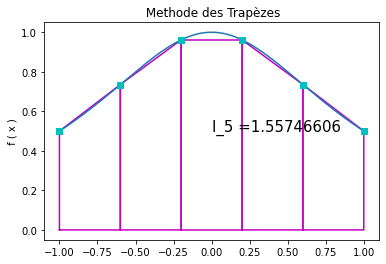

In [21]:
T.Graph(f)

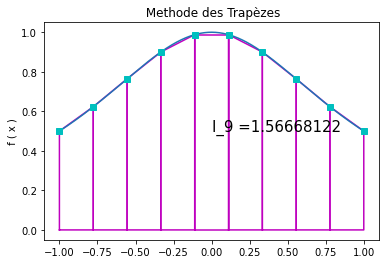

In [22]:
from ipywidgets import interact, interactive, fixed, interact_manual, widgets
def simul(n,f):
    T=Trapezoidal(-1,1,n,f)
    return T.Graph(f)
simul(9,f)

In [23]:
interact(simul,n=widgets.IntSlider(min=1, max=50, step=3, value=10),f={'1/(1+x**2)':lambda x:1/(1+x**2),'sin(x)':lambda x: sin(x),'cos(x)':lambda x:cos(x),'x**2-x+5':lambda x:x**2-x+5});

interactive(children=(IntSlider(value=10, description='n', max=50, min=1, step=3), Dropdown(description='f', o…

<p style="font-size:22px"><b><font color=#EB9544><u>Remarque  </u></font></b></p>

* cette méthode est donc équivalente à celle du point milieu ( ξ1 equiv ξ0' ), mais elle est deux fois plus lente.

<p style="font-size:30px"><b><font color="blue"><u>La méthode de Simpson </u></font></b></p>

En interpolant f par un polynôme de degré 2 (3 degrés de liberté), 3 points (ou conditions) sont nécessaires pour le caractériser : les valeurs aux extrémités a, b, et celle choisie en leur milieu m = (a + b) / 2. La méthode de Simpson est basée sur un polynôme de degré 2 (intégrale d’une parabole), tout en restant exacte pour des polynômes de degré 3 ; elle est donc d’ordre 3 :<img src='8.PNG'/>
<b>L’erreur globale est donnée par:</b> <img src='9.PNG'/>

:<img src='10.PNG'/>


<p style="font-size:24px"><b><font color="red"><u>4- La méthode de  Simpson </u></font></b></p>

In [24]:
class Simpson(object):
    def __init__(self, a, b, n, f): 
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n+1)
        self.f = f
        self.n = n #

    def integrate(self,f):
        x=self.x 
        y=f(x)
        h = float(x[1] - x[0])
        n = len(x) - 1
        if n % 2 == 1:
            n =n-1
        s = y[0] + y[n] + 4.0 * sum(y[1:-1:2]) + 2.0 * sum(y[2:-2:2])
       
        return h * s / 3.0
    def Graph(self,f,resolution=1001):
        xl = self.x 
        yl = f(xl) 
        xlist_fine=np.linspace(self.a, self.b, resolution)
       
        for i in range(self.n):
            x1=np.linspace(xl[i], xl[i+1], resolution)
            m=(xl[i]+xl[i+1])/2
            bg=xl[i]
            bd=xl[i+1]
            l0 = (x1-m)/(bg-m)*(x1-bd)/(bg-bd)
            l1 = (x1-bg)/(m-bg)*(x1-bd)/(m-bd)
            l2 = (x1-bg)/(bd-bg)*(x1-m)/(bd-m)
            P = f(bg)*l0 + f(m)*l1 + f(bd)*l2
            plt.plot(x1,P,'b')
            plt.plot(m,f(m),"g*")
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine, yflist_fine,'b')
        plt.plot(xl, yl,'r')
        
        plt.ylabel('f(x)')
        plt.title('Simpson')
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

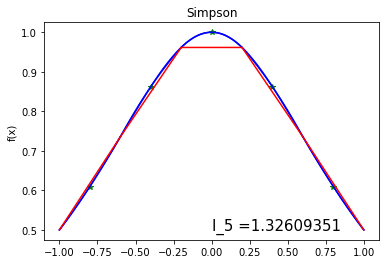

In [25]:
f=lambda x:1/(1+x**2)
S=Simpson(-1,1,5,f)
S.integrate(f)
S.Graph(f)

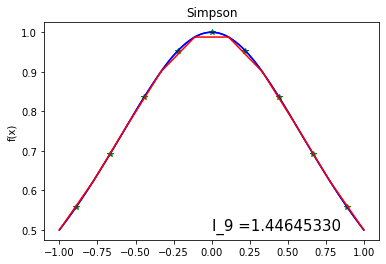

In [26]:
from ipywidgets import interact, interactive, fixed, interact_manual, widgets
def simul(n,f):
    S=Simpson(-1,1,n,f)
    return S.Graph(f)
simul(9,f)

In [27]:
interact(simul,n=widgets.IntSlider(min=1, max=50, step=3, value=10),f={'1/(1+x**2)':lambda x:1/(1+x**2),'sin(x)':lambda x: sin(x),'cos(x)':lambda x:cos(x),'x**2-x+5':lambda x:x**2-x+5});

interactive(children=(IntSlider(value=10, description='n', max=50, min=1, step=3), Dropdown(description='f', o…

<p style="font-size:22px"><b><font color=#EB9544><u>Remarque  </u></font></b></p>

* comme la méthode du point milieu qui caractérise un polynôme de degré 0 et qui reste exacte pour tout polynôme de degré 1, la méthode de Simpson caractérise un polynôme de degré 2 et reste exacte pour tout polynôme de degré 3. Il s’agit d’une sorte d’anomalie où se produisent des compensations bénéfiques à l’ordre de la méthode.

* Cette méthode d’intégration est exacte pour les fonctions f polynomiales d’ordre 3 (car elles vérifient f(4) = 0), ce qui inclut en particulier les fonctions constantes, les fonctions affines, et les paraboles par exemple. Plus généralement elle est d’autant plus précise que les variations de f sont faibles (f(4) petit).

* Plus l’intervalle [a, b] est petit, plus l’erreur est faible. Cette erreur décroit en h5 lorsque h diminue,c’est à dire beaucoup plus rapidement que les méthodes précédentes  Ainsi, pour des intervalles [a, b] suffisamment petits, la méthode de Simpson est toujours plus précise que les méthodes précédentes.

<p style="font-size:24px"><b><font color="red"><u>5-les quatres méthodes d'interpolation numérique  </u></font></b></p>

In [28]:
def sim(n,f):
    R=RectangleG(-1,1,n,f)
    M=RectangleM(-1,1,n,f)
    T=Trapezoidal(-1,1,n,f) 
    S=Simpson(-1,1,n,f)
    fig= plt.figure(figsize=(10,10))
    plt.subplot(321)
    R.Graph(f)  
    plt.subplot(322)    
    T.Graph(f)
    plt.subplot(323)
    M.Graph(f)  
    plt.subplot(324)    
    S.Graph(f)
    
    plt.show()

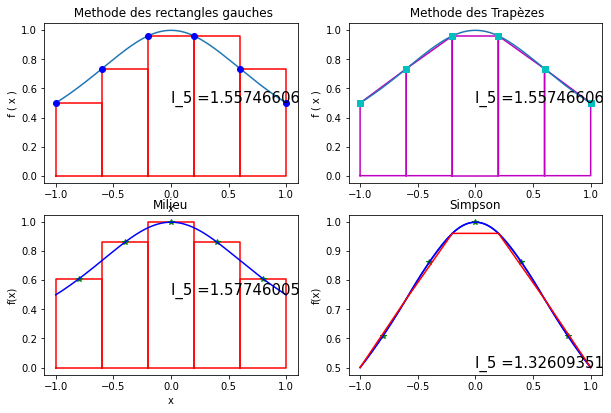

In [29]:
sim(5,f)

In [30]:
interact(sim,n=widgets.IntSlider(min=1, max=50, step=2, value=5),f={'1/(1+x**2)':lambda x:1/(1+x**2),'sin(x)':lambda x: sin(x),'cos(x)':lambda x:cos(x),'x**2-x+5':lambda x:x**2-x+5});

interactive(children=(IntSlider(value=5, description='n', max=50, min=1, step=2), Dropdown(description='f', op…

<p style="font-size:32px"><b><font color="blue"><u>EXECUTION</u></font></b></p>

<img src='interpolationNumerique.gif'/>

In [31]:
def sim1(a,b,n,f,i,x):
    R=RectangleG(-1,1,n,f)
    M=RectangleM(-1,1,n,f)
    T=Trapezoidal(-1,1,n,f) 
    S=Simpson(-1,1,n,f)
   # fig= plt.figure(figsize=(6,6))
    plt.subplot(221)
    R.Graph(f)  
    plt.subplot(222)    
    T.Graph(f)
    plt.subplot(223)
    M.Graph(f)  
    plt.subplot(224) 
    S.Graph(f)

    plt.show()

In [32]:
%matplotlib widget
int_slider = widgets.IntSlider(value=5, min=1, max=50, step=2, description='N')
#int_slider=(widgets.IntSlider(min=1, max=50, step=2, value=5))
text_a = widgets.IntText(value=1,description='Valeur de a', continuous_update=False)
text_b = widgets.IntText(value=1,description='Valeur de b', continuous_update=False)
select = widgets.Dropdown(options={'1/(1+x**2)':lambda x:1/(1+x**2),
                                   'sin(x)':lambda x: sin(x),
                                   'cos(x)':lambda x:cos(x),
                                   'x**2-x+5':lambda x:x**2-x+5},description='fonction')  #on peut ajouter d'autres fonctions  
text_x=widgets.Text(value='x',description='x',continuous_update=False)
text_y=widgets.Text(value='f(x)',description='y',continuous_update=False)
button = widgets.Button(description="plot")
def update(change):
    fig.clear()
    sim1(text_a.value,text_b.value,int_slider.value,select.value,text_x.value,text_y.value)
def update_x(change):
    fig.clear()
    sim1(text_a.value,text_b.value,int_slider.value,select.value,text_x.value,text_y.value)
def update_y(change):
    fig.clear()
    sim1(text_a.value,text_b.value,int_slider.value,select.value,text_x.value,text_y.value)
def on_button_clicked(b):
    with output:
        fig.clear()
        sim1(text_a.value,text_b.value,int_slider.value,select.value,text_x.value,text_y.value)
int_slider.observe(update,'value')
text_x.observe(update_x,'value')
text_y.observe(update_y,'value')    







In [33]:

output =widgets.Output()
with output:
    fig=plt.figure(figsize=(9,6))
    
fig.canvas.toolbar_position='bottom'

In [34]:
controls=widgets.VBox([int_slider,text_a,text_b,select,text_x,text_y,button])
button.on_click(on_button_clicked)
widgets.VBox([controls,output])

<p style="font-size:32px"><b><font color="blue"><u>EXECUTION</u></font></b></p>

<img src='final1.gif'/>